In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./Resources/Mouse_metadata.csv"
study_results_path = "./Resources/Study_results.csv"

# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)


# Combine the data into a single dataset
combined_data= pd.merge(study_results, mouse_metadata,
                       on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice
mice_count=len(combined_data["Mouse ID"].unique())
mice_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_data_df=combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:

combined_data_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [7]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data["Mouse ID"].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [8]:
clean_data=combined_data[~combined_data["Mouse ID"].isin(combined_data_df["Mouse ID"])]

In [9]:
clean_data["Mouse ID"].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'z314', 'o848', 'v719', 'q597', 'c895',
      

In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count=len(clean_data["Mouse ID"].unique())
clean_mice_count


248

# Summary Statistics 

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_stats= clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_stats=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_stats=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
sd_stats=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_stats=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem() 



In [12]:
# Assemble the resulting series into a single summary DataFrame.

statistics_summary= pd.DataFrame({"Mean Tumor Volume": mean_stats, "Median Tumor Volume": median_stats,
                                  "Tumor Volume Variance": var_stats, "Tumor Volume Std. Dev.": sd_stats,
                                 "Tumor Volume Std. Err.": sem_stats})

statistics_summary.index.name= "Drug Regimen"

statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean_stats_agg =clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('mean')
median_stats_agg=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('median')
var_stats_agg=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('var')
sd_stats_agg=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('std')
sem_stats_agg=clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('sem') 


# Using the aggregation method, produce the same summary statistics in a single line.

In [14]:
statistics_summary_agg= pd.DataFrame({"mean": mean_stats_agg, "median": median_stats_agg,
                                  "var": var_stats_agg, "std": sd_stats_agg,
                                 "sem": sem_stats_agg})

statistics_summary_agg.index.name= "Drug Regimen"



statistics_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

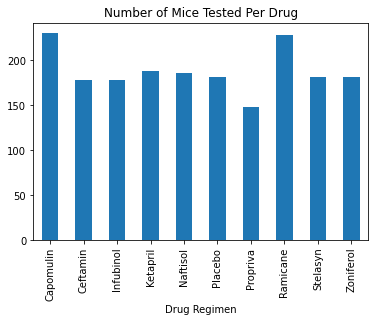

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_name=clean_data.groupby("Drug Regimen")

time=drug_name["Mouse ID"].count()
bar_panda=time.plot(kind="bar", title="Number of Mice Tested Per Drug")
bar_panda.set_xlabel=("Drug Regimen")
bar_panda.set_ylabel=("Number of Mice Tested")

plt.show()

#Set x axis and tick locations
# x_axis=np.arange(len(clean_data))
# tick_locations=[value for value in x_axis]

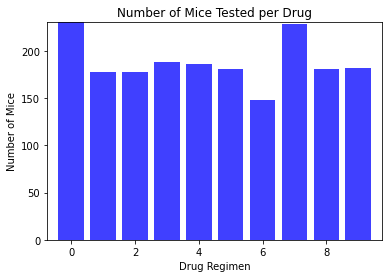

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis=np.arange(0, len(drug_name))
tick_locations=[]
for x in x_axis:
    tick_locations.append(x)
    
plt.title("Number of Mice Tested per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(drug_name)-.25)
plt.ylim(0, max(time))

plt.bar(x_axis, time, facecolor="blue", alpha =.75, align="center")
plt.show()

